In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk

In [2]:
df = pd.read_csv('Mall_Customers.csv')

# EDA

## Analysis of the shape of the data

First, for this problem, there is not a target data, because the problem is unsupervised. The goal is to find the best way to cluster the customers data.

**Number of rows and columns**

In [3]:
df.columns.value_counts().sum()

5

In [4]:
df.count()[0]

200

There are 200 rows and 5 columns.

**Types of variables**

In [5]:
df.dtypes.value_counts()

int64     4
object    1
dtype: int64

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


There are 4 variables of type int64 and 1 variable of type object.

The variable `Gender` is the only variable of type object.

**Missing values**

In [7]:
df.isna().sum().sum()

0

There are no missing values in our dataset.

## Deep data analysis

**Understanding the input data**

As we saw just before, there are 5 columns in the dataset:

* CustomerID
* Gender
* Age
* Annual Income (k$)
* Spending Score (1-100)

The customerID is just an identifier that we can drop

In [8]:
df = df.drop(['CustomerID'], axis=1)

In [9]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Now let's analyze the other columns.

**Gender**

In [10]:
df["Gender"].nunique()

2

There are 2 unique values in the `Gender` column:

* Male
* Female

To simplify the analysis, we can convert the `Gender` column to a binary column, where 0 represents `Female` and 1 represents `Male`.

In [11]:
df["Gender"] = df["Gender"].map({"Female": 0, "Male": 1})


In [12]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


(array([112.,  88.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

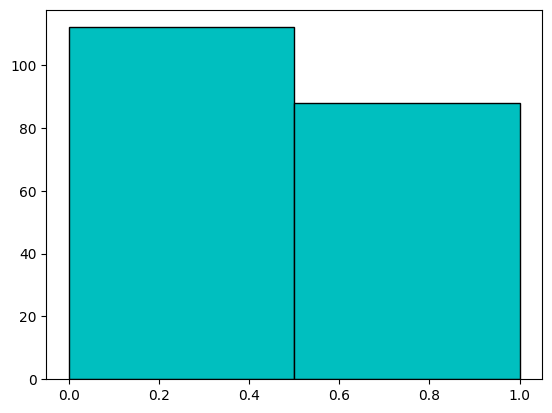

In [13]:
plt.hist(df['Gender'],bins=2, color='c', edgecolor='black')

There are 112 women and 88 men

**Age**

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

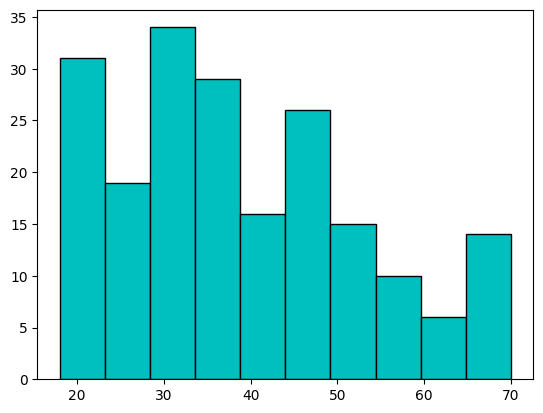

In [14]:
plt.hist(df['Age'],bins=10, color='c', edgecolor='black')

In [15]:
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

**Annual Income (k$)**

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

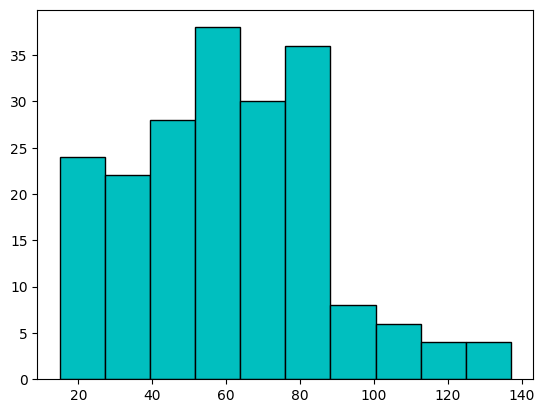

In [16]:
plt.hist(df['Annual Income (k$)'],bins=10, color='c', edgecolor='black')

In [17]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

**Spending Score (1-100)**

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

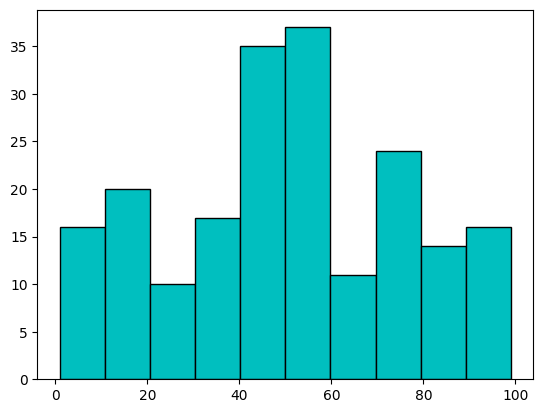

In [18]:
plt.hist(df['Spending Score (1-100)'],bins=10, color='c', edgecolor='black')

In [19]:
df['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

**Analysis of the correlation between the variables**

<AxesSubplot:>

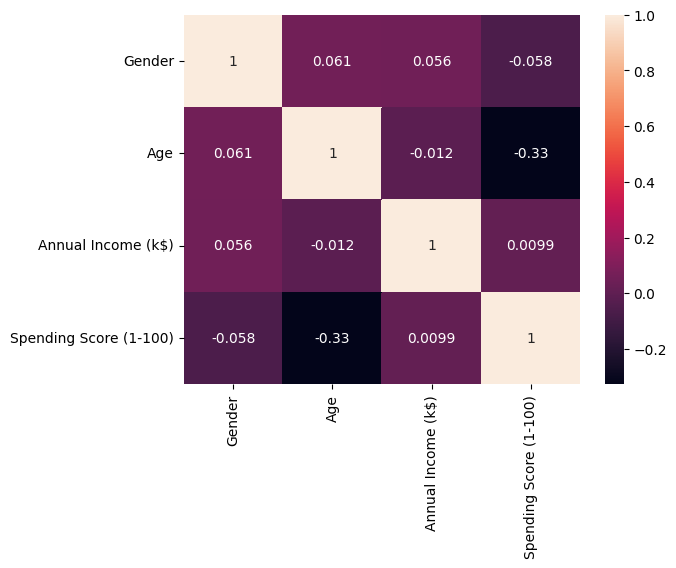

In [20]:
sns.heatmap(df.corr(), annot=True)

## Conclusion of the EDA

# Model training

## Choosing the model

As mentioned before, the problem to solve is a clustering problem. To solve this problem, two models will be tested:

* KMeans
* DBSCAN

To train such models, the number of clusters must be defined. <!-- To do so, the Elbow method will be used. -->

Text(0.5, 0, 'Spending Score (1-100)')

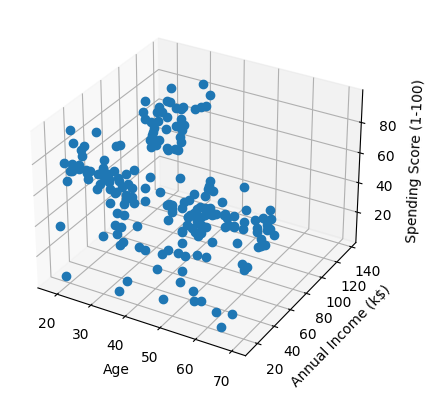

In [22]:
# create a 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], marker='o', linestyle='')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

According to the visualizations, the best number of clusters is 3

Before training the models, the data must be separated into a training set and a test set. The training set will be used to train the models, and the test set will be used to evaluate the models.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [28]:
X_train

,Gender,Age,Annual Income (k$),Spending Score (1-100)
79,0,49,54,42
197,1,32,126,74
38,0,36,37,26
24,0,54,28,14
122,0,40,69,58
...,...,...,...,...
106,0,66,63,50
14,1,37,20,13
92,1,48,60,49
179,1,35,93,90


Now two models will be trained: KMeans and DBSCAN.

In [30]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [67]:
K_means = KMeans(n_clusters=3,random_state=42)
K_means.fit(X_train)

/home/sacha/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

Text(0.5, 0, 'Spending Score (1-100)')

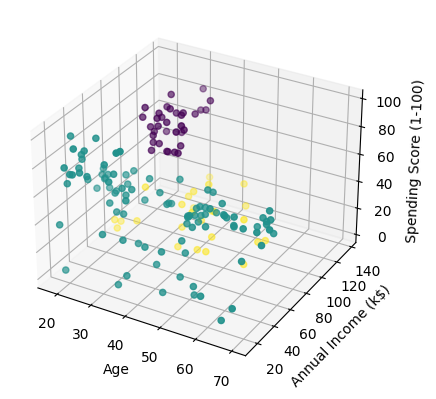

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['Age'], X_train['Annual Income (k$)'], X_train['Spending Score (1-100)'], c=K_means.labels_, marker='o')
# ax.scatter(K_means.cluster_centers_[:,0], K_means.cluster_centers_[:,1], K_means.cluster_centers_[:,2], c='red', marker='x', s=100)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

Text(0.5, 0, 'Spending Score (1-100)')

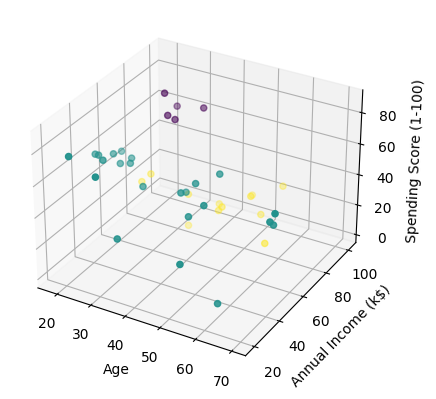

In [69]:
y_pred = K_means.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['Age'], X_test['Annual Income (k$)'], X_test['Spending Score (1-100)'], c=y_pred, marker='o')
# ax.scatter(K_means.cluster_centers_[:,0], K_means.cluster_centers_[:,1], K_means.cluster_centers_[:,2], c='red', marker='x', s=100)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

Now, the DBSCAN model will be trained.

Text(0.5, 0, 'Spending Score (1-100)')

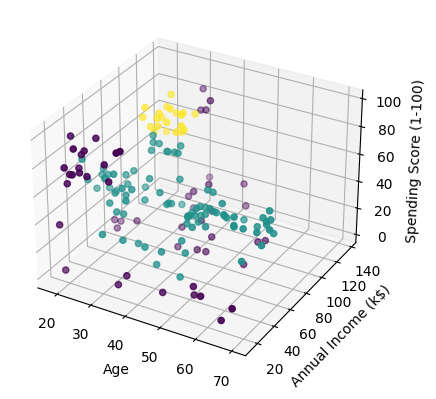

In [62]:
DB_SCAN = DBSCAN(eps=25, min_samples=30)
DB_SCAN.fit(X_train)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['Age'], X_train['Annual Income (k$)'], X_train['Spending Score (1-100)'], c=DB_SCAN.labels_, marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

In [63]:
DB_SCAN.labels_

array([ 0, -1,  0, -1,  0, -1, -1, -1,  1,  0,  0,  1, -1,  0,  0,  0, -1,
        0, -1,  0,  0,  0, -1, -1, -1,  0,  0,  1,  0, -1,  0,  1, -1, -1,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  1,  0,  1,  0, -1,  0, -1,
        1,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1,  0,  1,  0, -1, -1,  0,
        0,  0, -1, -1, -1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1, -1, -1,
       -1, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0, -1, -1,
        1,  0,  0,  0, -1,  0,  0,  0, -1,  1,  0, -1, -1,  0,  1,  0, -1,
        0,  1, -1,  1,  1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1,
        0,  0,  0, -1, -1,  0,  1, -1,  1,  0,  0,  0,  0,  0,  0, -1,  0,
       -1,  0,  0, -1,  0,  1,  0])

The DBSCAN seems really bad for this problem, the KMeans brings better results.

# Analysis of the results

In [86]:
df_labels = pd.concat([X_train, pd.DataFrame(K_means.labels_, columns=['Cluster'],index=X_train.index)], axis=1)

In [87]:
df_labels

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
79,0,49,54,42,1
197,1,32,126,74,0
38,0,36,37,26,1
24,0,54,28,14,1
122,0,40,69,58,1
...,...,...,...,...,...
106,0,66,63,50,1
14,1,37,20,13,1
92,1,48,60,49,1
179,1,35,93,90,0


To understand the clusters, a statistical analysis will be performed.

In [92]:
df_labels[df_labels['Cluster']==0].describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,34.000000,34.000000,34.000000,34.000000,34.0
mean,0.470588,32.941176,87.823529,82.970588,0.0
std,0.506640,3.757346,16.887274,9.440356,0.0
min,0.000000,27.000000,69.000000,63.000000,0.0
25%,0.000000,30.000000,77.000000,75.000000,0.0
50%,0.000000,32.000000,80.000000,85.500000,0.0
75%,1.000000,35.750000,97.750000,90.750000,0.0
max,1.000000,40.000000,137.000000,97.000000,0.0


In [90]:
df_labels[df_labels['Cluster']==1].describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,100.000000,100.00000,100.000000,100.000000,100.0
mean,0.390000,40.75000,43.890000,49.800000,1.0
std,0.490207,15.94015,16.553491,20.694019,0.0
min,0.000000,18.00000,15.000000,3.000000,1.0
25%,0.000000,26.75000,29.000000,42.000000,1.0
50%,0.000000,39.00000,45.000000,49.000000,1.0
75%,1.000000,53.00000,60.000000,59.000000,1.0
max,1.000000,70.00000,69.000000,99.000000,1.0


In [91]:
df_labels[df_labels['Cluster']==2].describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,26.000000,26.000000,26.000000,26.000000,26.0
mean,0.538462,39.653846,89.307692,18.576923,2.0
std,0.508391,11.565266,18.156584,11.866501,0.0
min,0.000000,19.000000,71.000000,1.000000,2.0
25%,0.000000,33.250000,76.250000,9.250000,2.0
50%,1.000000,41.000000,83.500000,16.000000,2.0
75%,1.000000,47.000000,98.500000,27.750000,2.0
max,1.000000,59.000000,137.000000,40.000000,2.0


The first cluster has 34 customers, their average income is $87k per year, and their average spending score is 82. This cluster seems to correspond to the customers with a high income and a fidelity to the mall.

The second cluster has 100 customers, their average income is $48k per year, and their average spending score is 50. This cluster seems to correspond to the customers with a medium income and a medium fidelity to the mall.

The third cluster has 26 customers, their average income is $89k per year, and their average spending score is 18. This cluster seems to correspond to the customers with a high income and a low fidelity to the mall.

From this analysis, we can conclude that the mall has 3 types of customers:

* Customers with a high income and a high fidelity to the mall
* Customers with a medium income and a medium fidelity to the mall
* Customers with a high income and a low fidelity to the mall

# Conclusion

The KMeans model was able to cluster the customers into 3 clusters. The analysis of the clusters shows that the mall has 3 types of customers:

* Customers with a high income and a high fidelity to the mall
* Customers with a medium income and a medium fidelity to the mall
* Customers with a high income and a low fidelity to the mall

This information can be used to improve the marketing strategy of the mall. For example, it could be interesting to send promotions to the customers with a high income and a low fidelity to the mall to increase their fidelity, or to send new offers to the customers with a high income and a high fidelity to the mall.